# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Understanding Data

In [2]:
# Loading Dataset
df = pd.read_csv('weather.csv')

In [3]:
# Showing Dataset
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
# This code randomly selects 7 rows from the DataFrame 'df' and returns them as a new DataFrame
df.sample(7)

,date,precipitation,temp_max,temp_min,wind,weather
1130,2015-02-04,8.4,10.6,4.4,1.7,rain
1434,2015-12-05,15.7,10.0,6.1,4.0,rain
1359,2015-09-21,0.0,18.3,9.4,2.7,fog
1367,2015-09-29,0.0,21.7,8.9,1.9,sun
695,2013-11-26,0.0,12.2,2.8,1.0,sun
357,2012-12-23,6.6,7.2,3.3,2.5,rain
937,2014-07-26,0.0,26.1,13.3,3.6,sun


In [5]:
# check how data big is or shape of the dataset 
df.shape

(1461, 6)

In [6]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
# Check total number of missing values in a dataset
df.isnull().sum().sum()

0

In [8]:
# Check is there any duplicate values in a dataset or not
df.duplicated().sum()

0

In [9]:
# Check the statistical information about the dataset
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [10]:
# Check 'value_counts' of 'precipitation'
df['precipitation'].value_counts()

0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64

In [11]:
# Check 'value_counts' of 'temp_max'
df['temp_max'].value_counts()

 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64

In [12]:
# Check 'value_counts' of 'temp_min'
df['temp_min'].value_counts()

 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: temp_min, dtype: int64

In [13]:
# Check 'value_counts' of 'wind'
df['wind'].value_counts()

2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: wind, Length: 79, dtype: int64

In [14]:
# Check 'value_counts' of 'weather'
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

# Handling Date Column

In [15]:
# Converting to datetime datatype
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [17]:
# Extract year
df['date_year'] = df['date'].dt.year
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,date_year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [18]:
# Extract month
df['date_month_no'] = df['date'].dt.month
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [19]:
# Extract day
df['date_day'] = df['date'].dt.day
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no,date_day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [20]:
# Extract day of week
df['date_dow'] = df['date'].dt.dayofweek
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no,date_day,date_dow
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,6
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,3


In [21]:
# Extract quarter
df['quarter'] = df['date'].dt.quarter
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no,date_day,date_dow,quarter
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,6,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,0,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,1,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,2,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,3,1


In [22]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   date_year      1461 non-null   int64         
 7   date_month_no  1461 non-null   int64         
 8   date_day       1461 non-null   int64         
 9   date_dow       1461 non-null   int64         
 10  quarter        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 125.7+ KB


In [23]:
# Dropping 'date' column
df = df.drop(columns=['date'], axis=1)

# Data Visualization

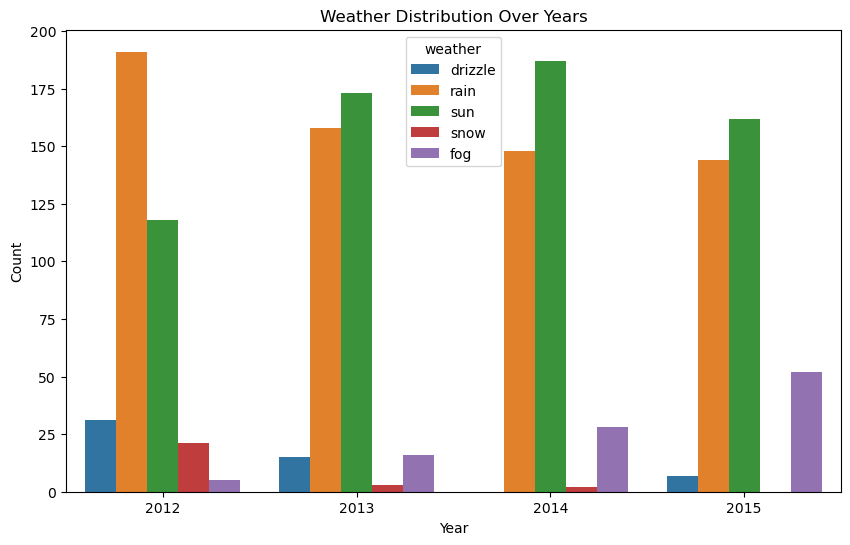

In [24]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='date_year', hue='weather', data=df)
plt.title('Weather Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

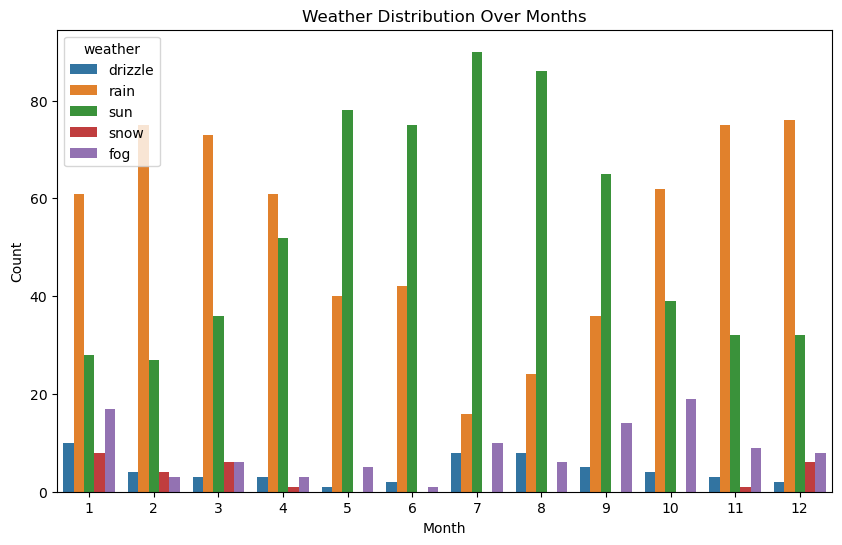

In [25]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='date_month_no', hue='weather', data=df)
plt.title('Weather Distribution Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

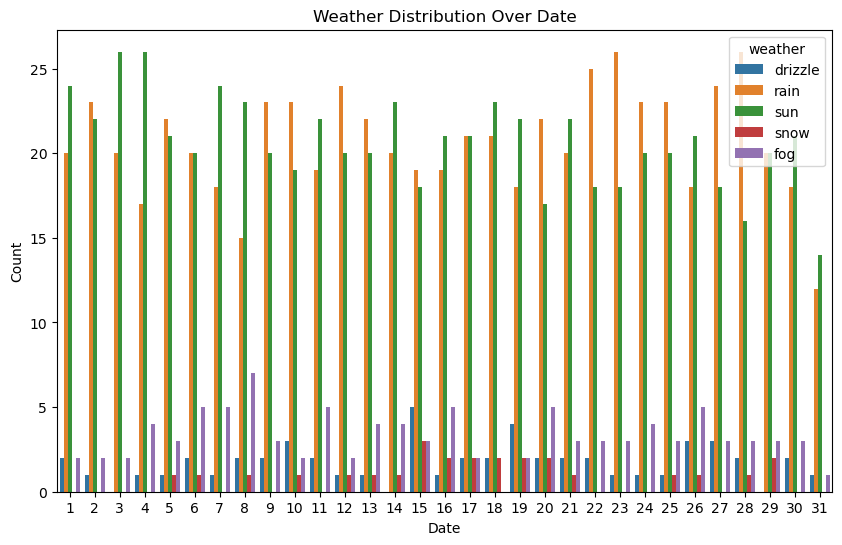

In [26]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='date_day', hue='weather', data=df)
plt.title('Weather Distribution Over Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

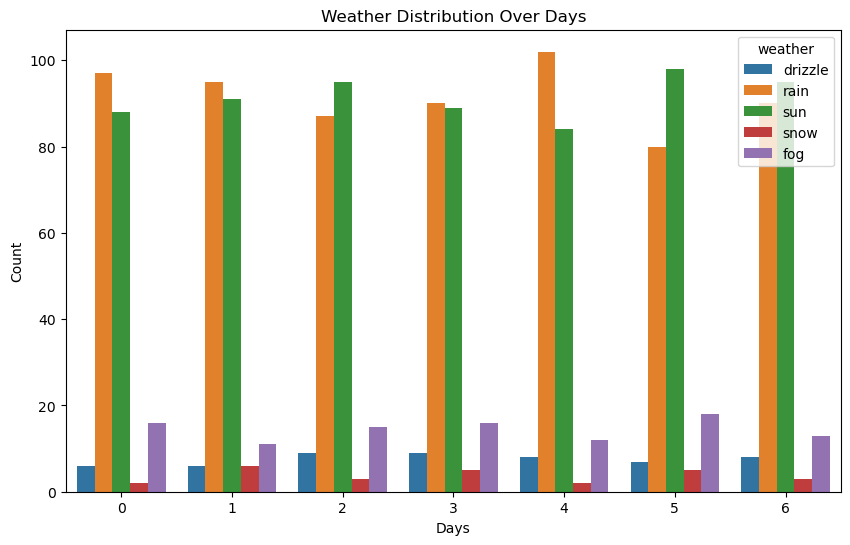

In [27]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='date_dow', hue='weather', data=df)
plt.title('Weather Distribution Over Days')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

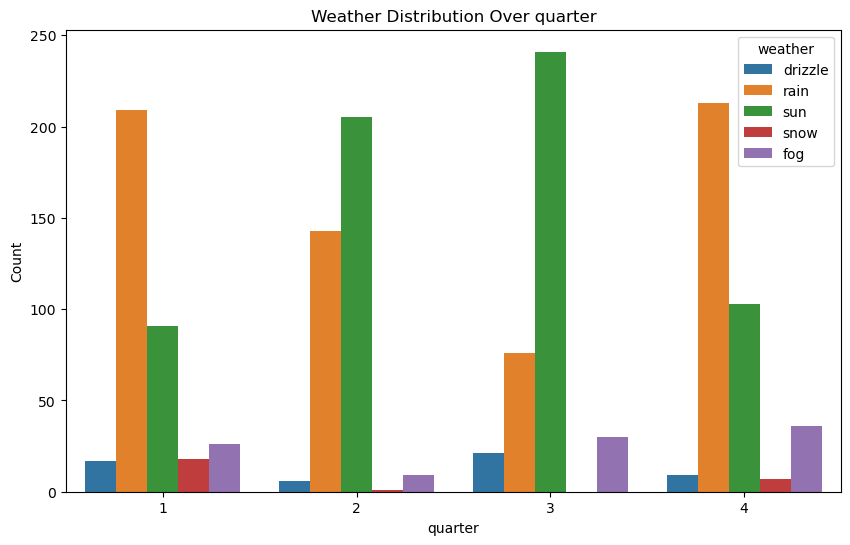

In [28]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='quarter', hue='weather', data=df)
plt.title('Weather Distribution Over quarter')
plt.xlabel('quarter')
plt.ylabel('Count')
plt.show()

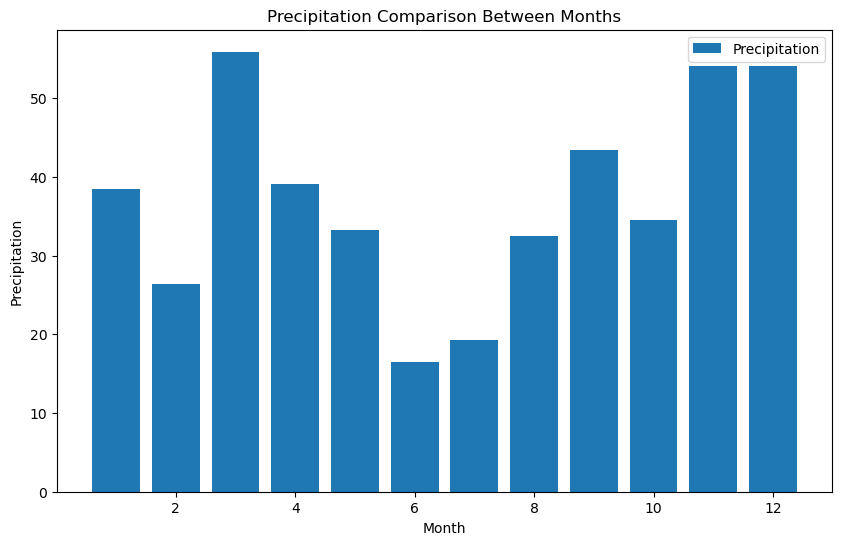

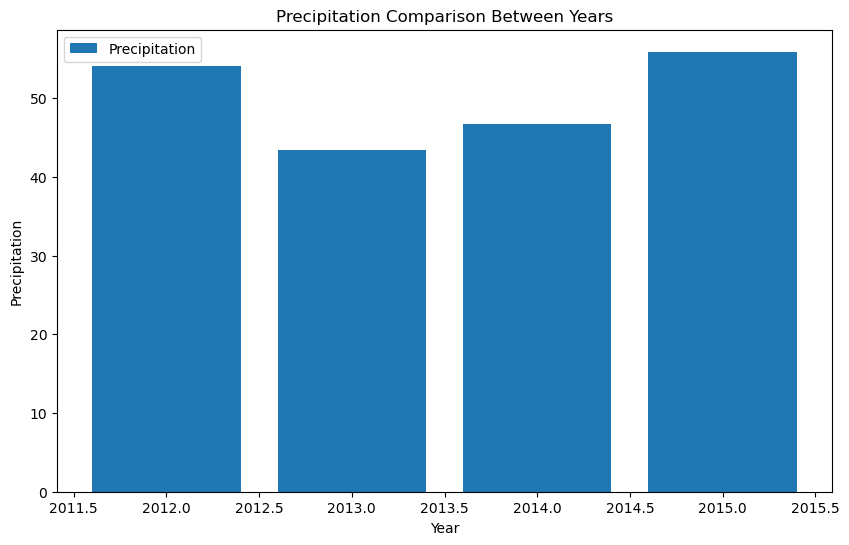

In [29]:
# Bar Plot for Precipitation Comparison Between Months
plt.figure(figsize=(10, 6))
plt.bar(df['date_month_no'], df['precipitation'], label='Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.title('Precipitation Comparison Between Months')
plt.legend()
plt.show()

# Bar Plot for Precipitation Comparison Between Years
plt.figure(figsize=(10, 6))
plt.bar(df['date_year'], df['precipitation'], label='Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Precipitation Comparison Between Years')
plt.legend()
plt.show()

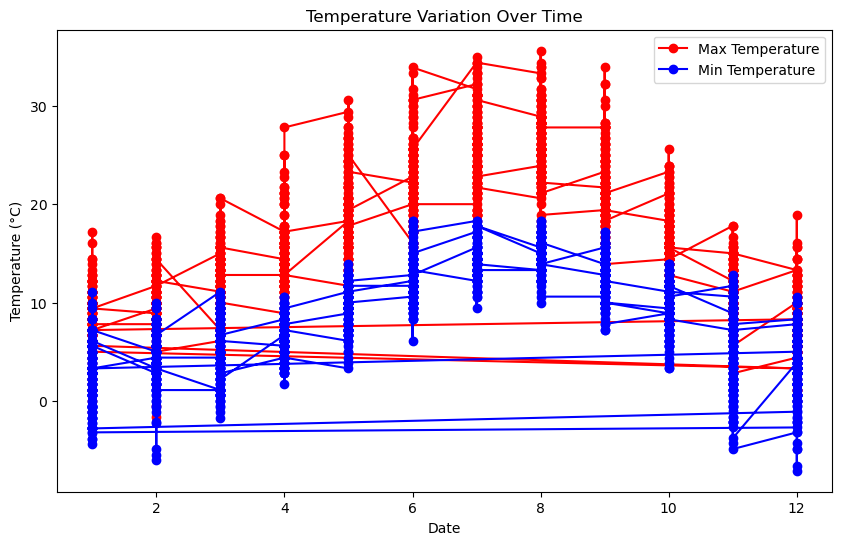

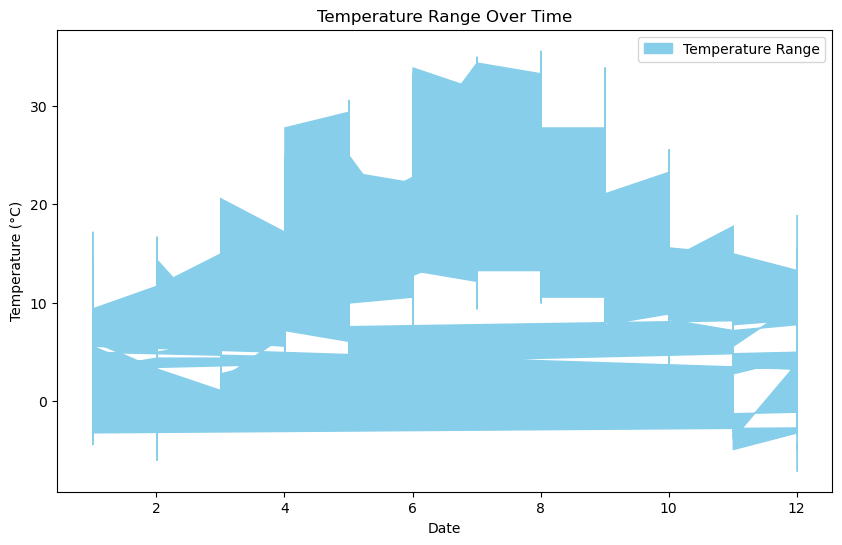

In [30]:
# Line Plot for Temperature Variation Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['date_month_no'], df['temp_max'], label='Max Temperature', color='red', marker='o')
plt.plot(df['date_month_no'], df['temp_min'], label='Min Temperature', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation Over Time')
plt.legend()
plt.show()

# Area Plot for Temperature Range Over Time
plt.figure(figsize=(10, 6))
plt.fill_between(df['date_month_no'], df['temp_min'], df['temp_max'], color='skyblue', label='Temperature Range')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Range Over Time')
plt.legend()
plt.show()

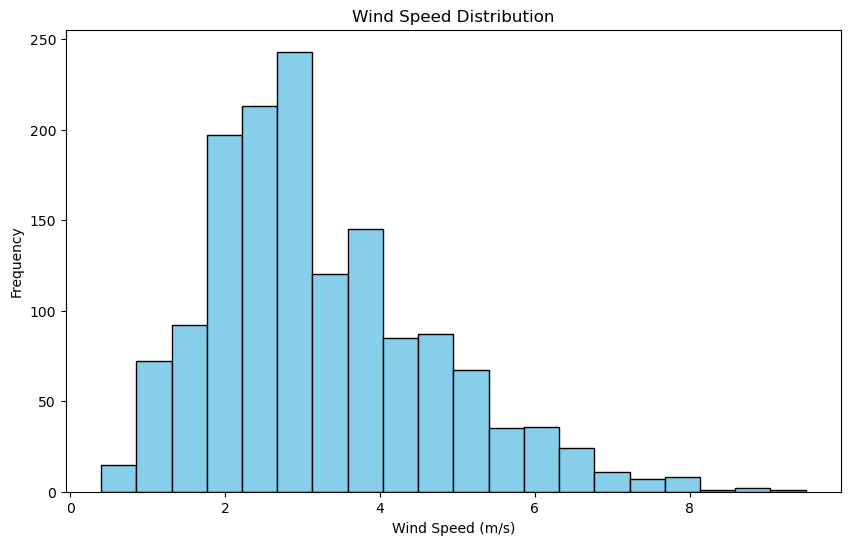

In [31]:
# Histogram for Wind Speed Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['wind'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.show()

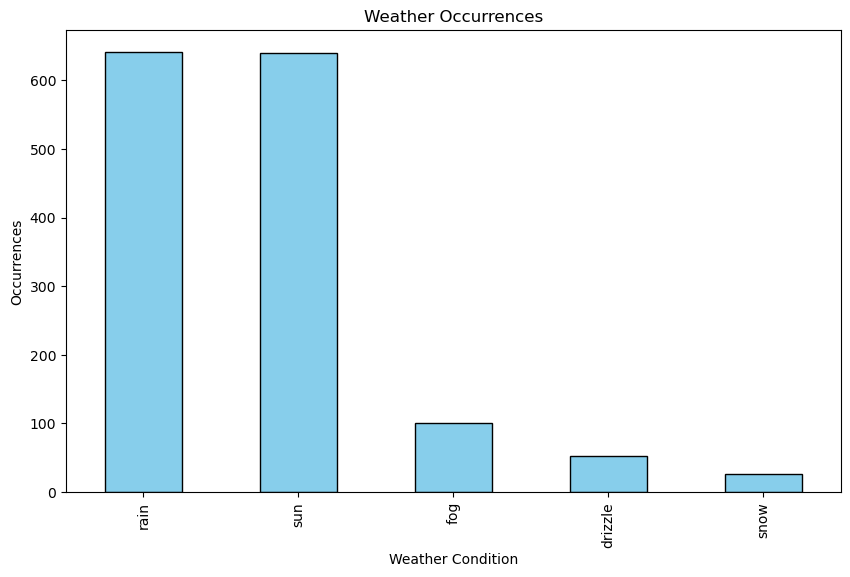

In [32]:
# Count the occurrences of each weather condition
weather_counts = df['weather'].value_counts()

# Bar Plot for Weather Occurrences
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Weather Condition')
plt.ylabel('Occurrences')
plt.title('Weather Occurrences')
plt.show()

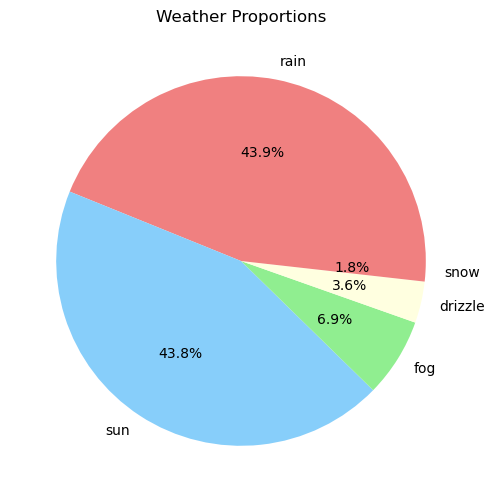

In [33]:
# Count the occurrences of each weather condition
weather_counts = df['weather'].value_counts()

# Pie Chart for Weather Proportions
plt.figure(figsize=(10, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 
                                                                                'lightyellow'])
plt.title('Weather Proportions')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_31816\2459454268.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['precipitation'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_31816\2459454268.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp_max'])
C:\Users\Dell\AppData\Local\Temp\i

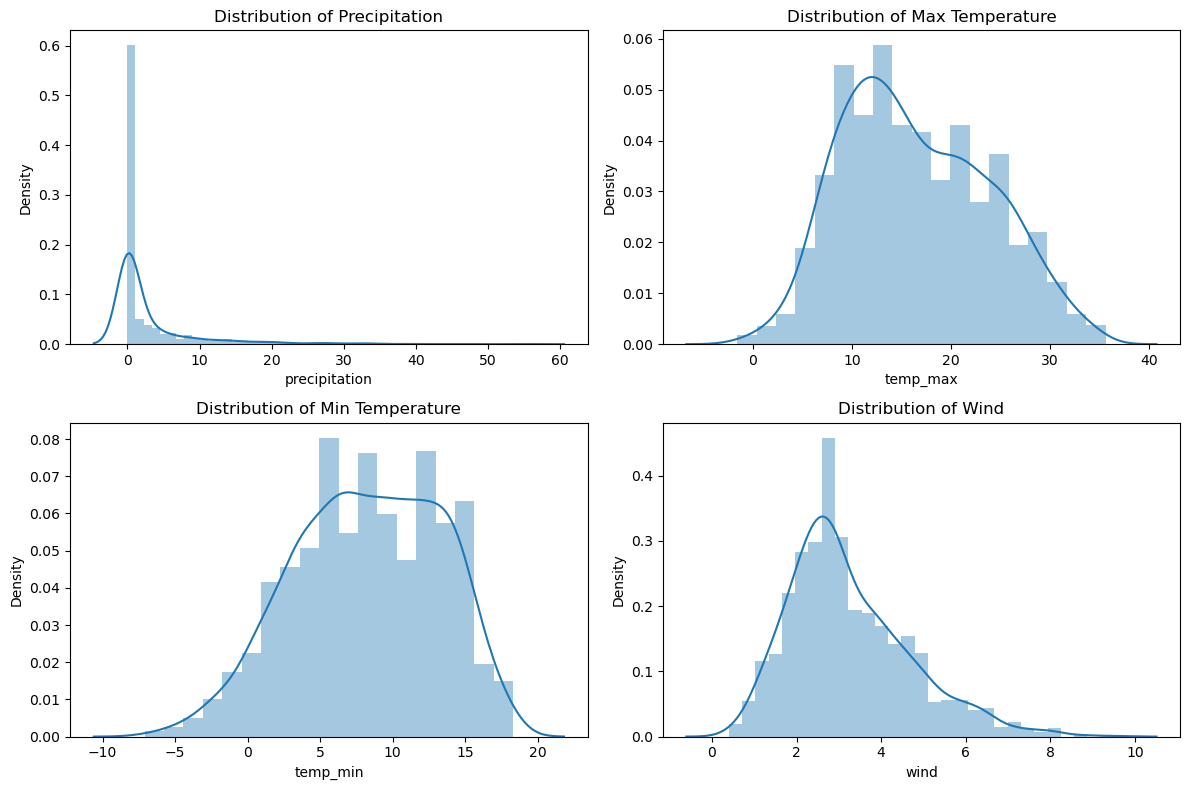

In [34]:
plt.figure(figsize=(12, 8))

# Distplot for Precipitation
plt.subplot(2, 2, 1)
sns.distplot(df['precipitation'])
plt.title('Distribution of Precipitation')

# Distplot for Maximum Temperature
plt.subplot(2, 2, 2)
sns.distplot(df['temp_max'])
plt.title('Distribution of Max Temperature')

# Distplot for Minimum Temperature
plt.subplot(2, 2, 3)
sns.distplot(df['temp_min'])
plt.title('Distribution of Min Temperature')

# Distplot for Wind
plt.subplot(2, 2, 4)
sns.distplot(df['wind'])
plt.title('Distribution of Wind')

plt.tight_layout()
plt.show()

# Label Encoding

In [35]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'weather' column
df['weather'] = label_encoder.fit_transform(df['weather'])

# Display the resulting DataFrame
df.head()

,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no,date_day,date_dow,quarter
0,0.0,12.8,5.0,4.7,0,2012,1,1,6,1
1,10.9,10.6,2.8,4.5,2,2012,1,2,0,1
2,0.8,11.7,7.2,2.3,2,2012,1,3,1,1
3,20.3,12.2,5.6,4.7,2,2012,1,4,2,1
4,1.3,8.9,2.8,6.1,2,2012,1,5,3,1


In [36]:
# Convert the 'weather columns' object to int
df['weather'] = df['weather'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int32  
 5   date_year      1461 non-null   int64  
 6   date_month_no  1461 non-null   int64  
 7   date_day       1461 non-null   int64  
 8   date_dow       1461 non-null   int64  
 9   quarter        1461 non-null   int64  
dtypes: float64(4), int32(1), int64(5)
memory usage: 108.6 KB


# Get Statistical Information, Correlation Matrix of Columns

In [37]:
""" This code provides statistical summary information about the DataFrame 'df,' including measures like count, mean, standard 
deviation, minimum, and maximum values for each numeric column. """

df.describe()

,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no,date_day,date_dow,quarter
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2.752225,2013.498973,6.522930,15.729637,2.997947,2.508556
std,6.680194,7.349758,5.023004,1.437825,1.191380,1.118723,3.449884,8.803105,2.001197,1.117465
min,0.000000,-1.600000,-7.100000,0.400000,0.000000,2012.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,10.600000,4.400000,2.200000,2.000000,2012.000000,4.000000,8.000000,1.000000,2.000000
50%,0.000000,15.600000,8.300000,3.000000,2.000000,2013.000000,7.000000,16.000000,3.000000,3.000000
75%,2.800000,22.200000,12.200000,4.000000,4.000000,2014.000000,10.000000,23.000000,5.000000,4.000000
max,55.900000,35.600000,18.300000,9.500000,4.000000,2015.000000,12.000000,31.000000,6.000000,4.000000


In [38]:
# This code calculates the correlation between numeric columns in the DataFrame 'df' and returns a correlation matrix
df.corr()

,precipitation,temp_max,temp_min,wind,weather,date_year,date_month_no,date_day,date_dow,quarter
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388,0.007034,0.027789,0.021649,0.029829,0.021978
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337,0.112499,0.154198,-0.040376,-0.003371,0.162634
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981,0.114654,0.216689,-0.008082,0.002549,0.223717
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858,-0.027417,-0.048125,-0.033699,0.026190,-0.063630
weather,-0.267388,0.322337,0.154981,-0.065858,1.000000,0.064560,0.022880,-0.040939,0.009841,0.014970
date_year,0.007034,0.112499,0.114654,-0.027417,0.064560,1.000000,0.001204,-0.001384,0.000152,0.001240
date_month_no,0.027789,0.154198,0.216689,-0.048125,0.022880,0.001204,1.000000,0.010522,-0.003019,0.971392
date_day,0.021649,-0.040376,-0.008082,-0.033699,-0.040939,-0.001384,0.010522,1.000000,0.000591,0.012246
date_dow,0.029829,-0.003371,0.002549,0.026190,0.009841,0.000152,-0.003019,0.000591,1.000000,-0.005965
quarter,0.021978,0.162634,0.223717,-0.063630,0.014970,0.001240,0.971392,0.012246,-0.005965,1.000000


In [39]:
# This code calculates the correlation of each numeric column with the 'weather' column in the DataFrame 'df'
df.corr()['weather']

precipitation   -0.267388
temp_max         0.322337
temp_min         0.154981
wind            -0.065858
weather          1.000000
date_year        0.064560
date_month_no    0.022880
date_day        -0.040939
date_dow         0.009841
quarter          0.014970
Name: weather, dtype: float64

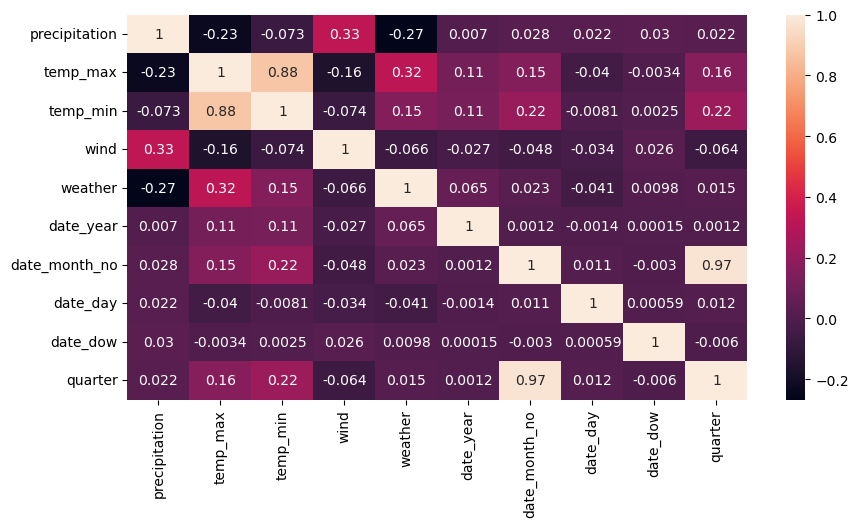

In [40]:
# This code creates a heatmap visualization of the correlation matrix for the DataFrame 'df' 
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [41]:
# Dropping 'date_year' and 'date_dow' column
df.drop(columns=['date_year', 'date_dow'], axis=1)

,precipitation,temp_max,temp_min,wind,weather,date_month_no,date_day,quarter
0,0.0,12.8,5.0,4.7,0,1,1,1
1,10.9,10.6,2.8,4.5,2,1,2,1
2,0.8,11.7,7.2,2.3,2,1,3,1
3,20.3,12.2,5.6,4.7,2,1,4,1
4,1.3,8.9,2.8,6.1,2,1,5,1
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,12,27,4
1457,1.5,5.0,1.7,1.3,2,12,28,4
1458,0.0,7.2,0.6,2.6,1,12,29,4
1459,0.0,5.6,-1.0,3.4,4,12,30,4


## Box Plot to Check The Outliers in Columns

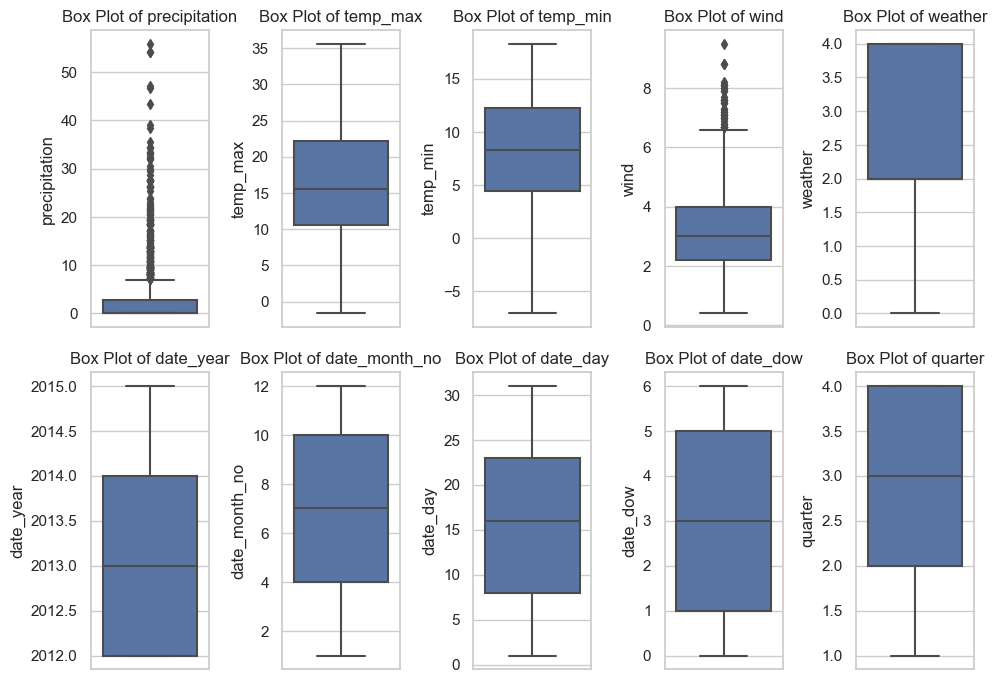

In [42]:
# List of columns for box plot to check the outliers
columns_for_boxplot = ['precipitation', 'temp_max', 'temp_min',
                              'wind', 'weather', 'date_year', 'date_month_no',
                              'date_day', 'date_dow', 'quarter']

# Set up the plotting environment
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(2, 5, i)  # Adjusted the subplot layout to 3 rows and 3 + 1columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Handling Outliers

In [43]:
# List of columns for which you want to apply capping
columns_for_capping = ['precipitation', 'wind']

# Define a function for capping
def cap_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return x.clip(lower=lower_bound, upper=upper_bound)

# Apply the capping function to the specified columns
df[columns_for_capping] = df[columns_for_capping].apply(cap_outliers)

## Box Plot To Check Outlier After Handling Outlier

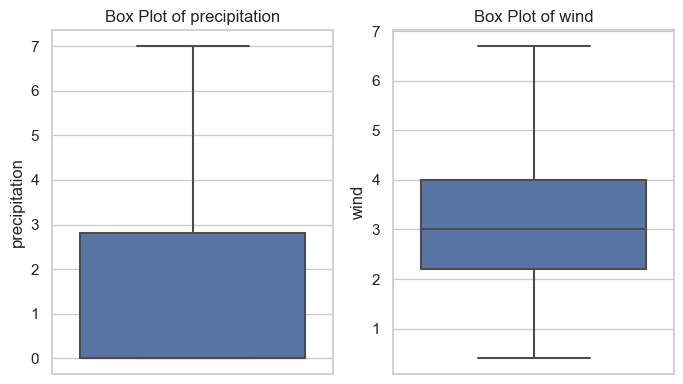

In [44]:
# List of columns for box plot to check the outliers
columns_for_boxplot = ['precipitation', 'wind']

# Set up the plotting environment
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

# Plot box plots for each column
for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(1, 2, i)  # Adjusted the subplot layout to 3 rows and 3 + 1columns
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Splitting Data into Training and Testing 

In [45]:
# Splitting the data
X = df.drop('weather', axis=1)
y = df['weather']

In [46]:
# train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# See the shape of X_train and X_test data
X_train.shape, X_test.shape

((1168, 9), (293, 9))

In [48]:
# See the shape of y_train and y_test data
y_train.shape, y_test.shape

((1168,), (293,))

# Logistic Regression Algorithm

In [49]:
# Create a Logistic Regression 
model_LR = LogisticRegression()

# Train the model on training set
model_LR.fit(X_train, y_train)

# Evaluate the accuracy of the model
pred = model_LR.predict(X_test)
print(accuracy_score(y_test, pred))

# Print other evaluation metrics like confusion matrix and classification report 
confusion = confusion_matrix(y_test, pred)
print('\n',confusion)

print('\n',classification_report(y_test, pred))

0.7747440273037542

 [[  0   0   2   0   7]
 [  0   0   2   0  23]
 [  0   0 105   0  15]
 [  0   0   7   0   1]
 [  0   0   9   0 122]]

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.84      0.88      0.86       120
           3       0.00      0.00      0.00         8
           4       0.73      0.93      0.82       131

    accuracy                           0.77       293
   macro avg       0.31      0.36      0.33       293
weighted avg       0.67      0.77      0.72       293



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

Training Accuracy =  77.48  %
Testing Accuracy =  77.47  %


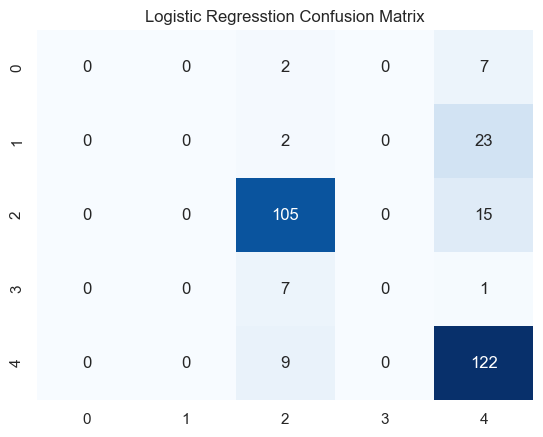

In [50]:
y_pred = model_LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,model_LR.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');